# Does latitude impact the spread of COVID-19?
* Here I use public datasets that are hosted on Kaggle to demonstrate that there are geographic variations in both SARS-CoV-2 infection rates and COVID-19 mortality rates. Specifically, I indentify a specific range of latitudes that allows for rapid spread of the COVID-19 coronavirus disease.

*Step 1: Import Python packages and load the data*

In [12]:
# Import Python Packages
import pandas as pd
import numpy as np
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

# Load Data
coordinates = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')
country_coordinates = coordinates[['country_code','latitude','longitude','country']]
state_coordinates = coordinates[['usa_state_code','usa_state_latitude','usa_state_longitude','usa_state']]
df = pd.read_csv('novel-corona-virus-2019-dataset/covid_19_data.csv')
df['Country/Region'].replace(['Mainland China'], 'China',inplace=True)
df['Country/Region'].replace(['US'], 'United States',inplace=True)
df['Country'] = df['Country/Region']
df = df[df.ObservationDate==np.max(df.ObservationDate)]
todays_date = '4/25/2020' # Update this line every time that you rerun the notebook

# Mortality rate for every country in the dataset
df_deaths = pd.DataFrame(df.groupby('Country')['Deaths'].sum())
df_confirmed = pd.DataFrame(df.groupby('Country')['Confirmed'].sum())
df_confirmed['Deaths'] = df_deaths['Deaths']
df_global = df_confirmed
df_global['Mortality Rate'] = np.round((df_global.Deaths.values/df_global.Confirmed.values)*100,2)
df_global = df_global.reset_index()
df_global = df_global.merge(country_coordinates, left_on='Country', right_on='country')
df_global = df_global[['Country','Confirmed','Deaths','Mortality Rate','latitude','longitude','country_code']]
df_global.columns = ['Country','Confirmed','Deaths','Mortality Rate','Latitude','Longitude','Country_Code']
df_global.to_csv('global_covid19_mortality_rates.csv')

# Mortality rate for every state in the USA
df_usa = df[df['Country/Region']=='United States']
df_usa = df_usa[df_usa.ObservationDate==np.max(df_usa.ObservationDate)]
df_usa['State'] = df_usa['Province/State']
df_usa['Mortality Rate'] = np.round((df_usa.Deaths.values/df_usa.Confirmed.values)*100,2)
df_usa.sort_values('Mortality Rate', ascending= False).head(10)
df_usa = df_usa.merge(state_coordinates, left_on='State', right_on='usa_state')
df_usa['Latitude'] = df_usa['usa_state_latitude']
df_usa['Longitude'] = df_usa['usa_state_longitude']
df_usa = df_usa[['State','Confirmed','Deaths','Recovered','Mortality Rate','Latitude','Longitude','usa_state_code']]
df_usa.columns = ['State','Confirmed','Deaths','Recovered','Mortality Rate','Latitude','Longitude','USA_State_Code']
df_usa.to_csv('usa_covid19_mortality_rates.csv')

# 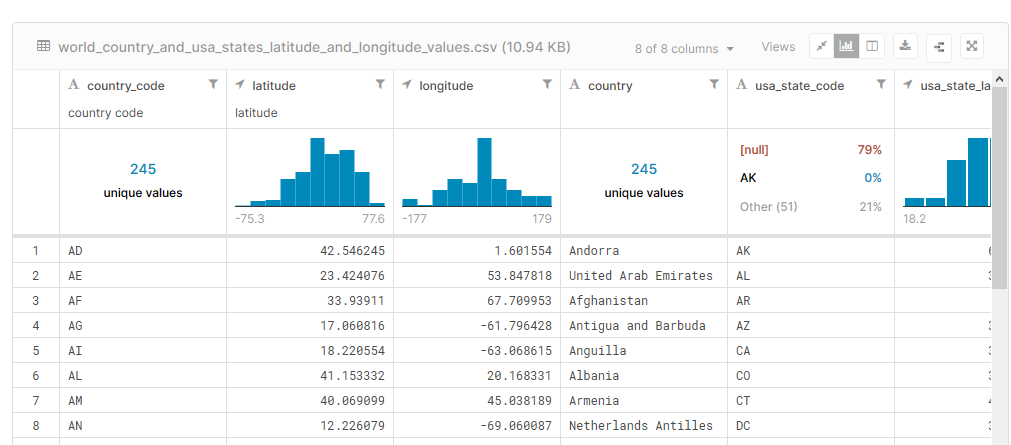

# 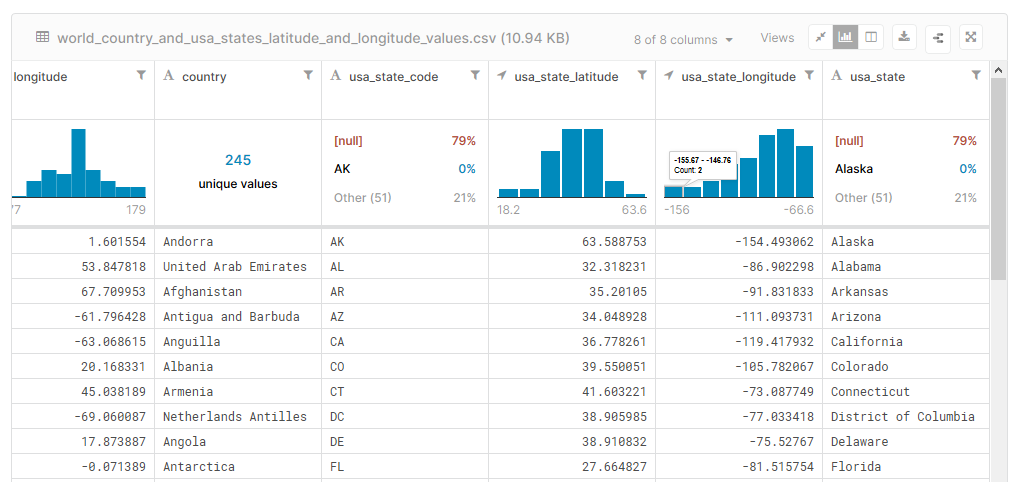

In [20]:
df.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Country
17688,17689,04/23/2020,NaN,Afghanistan,2020-04-24 03:31:35,1279.0,42.0,179.0,Afghanistan
17689,17690,04/23/2020,NaN,Albania,2020-04-24 03:31:35,663.0,27.0,385.0,Albania
17690,17691,04/23/2020,NaN,Algeria,2020-04-24 03:31:35,3007.0,407.0,1355.0,Algeria
17691,17692,04/23/2020,NaN,Andorra,2020-04-24 03:31:35,723.0,37.0,333.0,Andorra
17692,17693,04/23/2020,NaN,Angola,2020-04-24 03:31:35,25.0,2.0,6.0,Angola
17693,17694,04/23/2020,NaN,Antigua and Barbuda,2020-04-24 03:31:35,24.0,3.0,10.0,Antigua and Barbuda
17694,17695,04/23/2020,NaN,Argentina,2020-04-24 03:31:35,3435.0,165.0,919.0,Argentina
17695,17696,04/23/2020,NaN,Armenia,2020-04-24 03:31:35,1523.0,24.0,659.0,Armenia
17696,17697,04/23/2020,NaN,Austria,2020-04-24 03:31:35,15002.0,522.0,11694.0,Austria
17697,17698,04/23/2020,NaN,Azerbaijan,2020-04-24 03:31:35,1548.0,20.0,948.0,Azerbaijan


*Step 2: Map Spread of COVID-19 for Every Country*

In [21]:
fig = px.choropleth(df_global, 
                    locations="Country", 
                    color="Confirmed", 
                    locationmode = 'country names', 
                    hover_name="Country",
                    range_color=[0,300000],
                    title='Global COVID-19 Infections as of '+todays_date)
fig.show()

fig = px.choropleth(df_global, 
                    locations="Country", 
                    color="Deaths", 
                    locationmode = 'country names', 
                    hover_name="Country",
                    range_color=[0,25000],
                    title='Global COVID-19 Deaths as of '+todays_date)
fig.show()

fig = px.choropleth(df_global, 
                    locations="Country", 
                    color="Mortality Rate", 
                    locationmode = 'country names', 
                    hover_name="Country",
                    range_color=[0,10],
                    title='Global COVID-19 Mortality Rates as of '+todays_date)
fig.show()

*Step 3: Plot Spread of COVID-19 for Every Country*

In [14]:
fig = px.bar(df_global.sort_values('Confirmed',ascending=False)[0:20], 
             x="Country", 
             y="Confirmed",
             title='Global COVID-19 Infections as of '+todays_date)
fig.show()

fig = px.bar(df_global.sort_values('Deaths',ascending=False)[0:20], 
             x="Country", 
             y="Deaths",
             title='Global COVID-19 Deaths as of '+todays_date)
fig.show()

fig = px.bar(df_global.sort_values('Deaths',ascending=False)[0:20], 
             x="Country", 
             y="Mortality Rate",
             title='Global COVID-19 Mortality Rates as of '+todays_date+' for Countries with Top 20 Most Deaths')
fig.show()

*Step 4: Map Spread of COVID-19 for USA State*

In [16]:
fig = px.choropleth(df_usa, 
                    locations="USA_State_Code", 
                    color="Confirmed", 
                    locationmode = 'USA-states', 
                    hover_name="State",
                    range_color=[0,100000],scope="usa",
                    title='Global COVID-19 Infections as of '+todays_date)
fig.show()

fig = px.choropleth(df_usa, 
                    locations="USA_State_Code", 
                    color="Deaths", 
                    locationmode = 'USA-states', 
                    hover_name="State",
                    range_color=[0,5000],scope="usa",
                    title='Global COVID-19 Deaths as of '+todays_date)
fig.show()

fig = px.choropleth(df_usa, 
                    locations="USA_State_Code", 
                    color="Mortality Rate", 
                    locationmode = 'USA-states', 
                    hover_name="State",
                    range_color=[0,10],scope="usa",
                    title='Global COVID-19 Mortality Rate as of '+todays_date)
fig.show()

*Step 5: Plot Spread of COVID-19 for USA State*

In [9]:
fig = px.bar(df_usa.sort_values('Confirmed',ascending=False)[0:20], 
             x="State", 
             y="Confirmed",
             title='USA COVID-19 Infections as of '+todays_date)
fig.show()

fig = px.bar(df_usa.sort_values('Deaths',ascending=False)[0:20], 
             x="State", 
             y="Deaths",
             title='USA COVID-19 Deaths as of '+todays_date)
fig.show()

fig = px.bar(df_usa.sort_values('Deaths',ascending=False)[0:20], 
             x="State", 
             y="Mortality Rate",
             title='USA COVID-19 Mortality Rates as of '+todays_date+' for USA States with Top 20 Most Deaths')
fig.show()

*Step 6: Plot COVID-19 vs Latitude for Every Country*

In [17]:
df_global2 = df_global
df_global2['Latitude'] = abs(df_global2['Latitude'])
df_global2 = df_global2[df_global2['Country']!='China']

fig = px.scatter(df_global2.sort_values('Deaths',ascending=False), 
             x="Latitude", 
             y="Confirmed",
             title='Global COVID-19 Infections vs Absolute Value of Latitude Coordinate as of '+todays_date)
fig.show()

fig = px.scatter(df_global2.sort_values('Deaths',ascending=False), 
             x="Latitude", 
             y="Deaths",
             title='Global COVID-19 Deaths vs Absolute Value of Latitude Coordinate as of '+todays_date)
fig.show()
fig = px.scatter(df_global2.sort_values('Deaths',ascending=False), 
             x="Latitude", 
             y="Mortality Rate",
             title='Global COVID-19 Mortality Rates vs Absolute Value of Latitude Coordinate as of '+todays_date)
fig.show()
df_global.sort_values('Mortality Rate', ascending= False).head(10)

,Country,Confirmed,Deaths,Mortality Rate,Latitude,Longitude,Country_Code
114,Nicaragua,11.0,3.0,27.27,12.865416,-85.207229,NI
11,Bahamas,72.0,11.0,15.28,25.034280,-77.396280,BS
16,Belgium,42797.0,6490.0,15.16,50.503887,4.469936,BE
101,Mauritania,7.0,1.0,14.29,21.007890,-10.940835,MR
172,Zimbabwe,28.0,4.0,14.29,19.015438,29.154857,ZW
54,France,159460.0,21889.0,13.73,46.227638,2.213749,FR
2,Algeria,3007.0,407.0,13.54,28.033886,1.659626,DZ
77,Italy,189973.0,25549.0,13.45,41.871940,12.567380,IT
5,Antigua and Barbuda,24.0,3.0,12.50,17.060816,-61.796428,AG
150,Sweden,16755.0,2021.0,12.06,60.128161,18.643501,SE


*Step 7: Plot COVID-19 vs Latitude for Every USA State*

In [18]:
fig = px.scatter(df_usa.sort_values('Deaths',ascending=False), 
             x="Latitude", 
             y="Mortality Rate",
             title='USA States COVID-19 Mortality Rates vs Absolute Value of Latitude Coordinate as of '+todays_date)
fig.show()
df_usa.sort_values('Mortality Rate', ascending= False).head(10)

,State,Confirmed,Deaths,Recovered,Mortality Rate,Latitude,Longitude,USA_State_Code
22,Michigan,35296.0,2977.0,0.0,8.43,44.314844,-85.602364,MI
32,New York,263460.0,20973.0,0.0,7.96,43.299428,-74.217933,NY
6,Connecticut,23100.0,1639.0,0.0,7.10,41.603221,-73.087749,CT
23,Minnesota,2942.0,200.0,0.0,6.80,46.729553,-94.685900,MN
18,Louisiana,25739.0,1599.0,0.0,6.21,31.244823,-92.145024,LA
36,Oklahoma,3017.0,179.0,0.0,5.93,35.007752,-97.092877,OK
48,Washington,12753.0,711.0,0.0,5.58,47.751074,-120.740139,WA
17,Kentucky,3479.0,191.0,0.0,5.49,37.839333,-84.270018,KY
30,New Jersey,100025.0,5426.0,0.0,5.42,40.058324,-74.405661,NJ
14,Indiana,13039.0,706.0,0.0,5.41,40.551217,-85.602364,IN


# Conclusion

**Does latitude impact the spread of COVID-19?  Perhaps this notebook will help answer that question once we have more data.**